# Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load Data and Data Basic Info

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
d3 = pd.read_csv("/content/drive/MyDrive/Capstone/files/source3_str.csv")

In [ ]:
d3.head(20)

,qpid,target,var0474,var0475,var0476,var0477,var0478,var0479,var0480,var0481,var0482,var0483,var0484,var0485,var0486,var0487,var0488,var0489,var0490,var0491,var0492,var0493,var0494,var0495,var0496,var0497,var0498,var0499,var0500,var0501,var0502,var0503,var0504,var0505,var0506,var0507,var0508,var0509,var0510,var0511,...,var1096,var1097,var1098,var1099,var1100,var1101,var1102,var1103,var1104,var1105,var1106,var1107,var1108,var1109,var1110,var1111,var1112,var1113,var1114,var1115,var1116,var1117,var1118,var1119,var1120,var1121,var1122,var1123,var1124,var1125,var1126,var1127,var1128,var1129,var1130,var1131,var1132,var1133,var1134,var1135
0,24739091,1,6801.0,6801.0,356.754139,119.565217,1419.754177,0.371627,2.909018,357.915790,0.521675,0.0,1.595690,57.152307,348.896552,355.100403,357.572890,356.230506,1.279687,1.253285,1.269621,345.753571,1.236203,1.256161,1.225681,1.295308,0.864009,362.032143,1258.170018,0.560026,128.178535,0.548774,1.414082,1.661838,1478.609091,3.118579,0.850163,0.444362,1.390514,0.855705,...,150.0,264.0,55.0,19.0,60.0,5.291667,55.0,5.291667,52.0,29.240319,28.759585,-524.0,6.0,-0.94,19.0,50.392966,150.0,5.291667,59.480816,25.0,243.0,-1839.0,29.0,205.0,218.0,19.0,9.0,52.0,218.0,-1911.0,-497.0,264.0,126.0,-284.0,29.240319,9.0,42.0,9.0,-24.208333,44.0
1,24741045,0,6801.0,6801.0,356.754139,119.565217,1419.754177,0.371627,2.909018,357.915790,0.521675,0.0,1.595690,57.152307,348.896552,355.100403,357.572890,356.230506,1.279687,1.253285,1.269621,345.753571,1.236203,1.256161,1.225681,1.295308,0.864009,362.032143,1258.170018,0.560026,128.178535,0.548774,1.414082,1.661838,1478.609091,3.118579,0.850163,0.444362,1.390514,0.855705,...,150.0,264.0,55.0,19.0,60.0,5.291667,55.0,5.291667,52.0,29.240319,28.759585,-524.0,6.0,-0.94,19.0,50.392966,150.0,5.291667,59.480816,25.0,243.0,-1839.0,29.0,205.0,218.0,19.0,9.0,52.0,218.0,-1911.0,-497.0,264.0,126.0,-284.0,29.240319,9.0,42.0,9.0,-24.208333,44.0
2,24741658,0,6801.0,6801.0,356.754139,119.565217,1419.754177,0.371627,2.909018,357.915790,0.521675,0.0,1.595690,57.152307,348.896552,355.100403,357.572890,356.230506,1.279687,1.253285,1.269621,345.753571,1.236203,1.256161,1.225681,1.295308,0.864009,362.032143,1258.170018,0.560026,128.178535,0.548774,1.414082,1.661838,1478.609091,3.118579,0.850163,0.444362,1.390514,0.855705,...,150.0,264.0,55.0,19.0,60.0,5.291667,55.0,5.291667,52.0,29.240319,28.759585,-524.0,6.0,-0.94,19.0,50.392966,150.0,5.291667,59.480816,25.0,243.0,-1839.0,29.0,205.0,218.0,19.0,9.0,52.0,218.0,-1911.0,-497.0,264.0,126.0,-284.0,29.240319,9.0,42.0,9.0,-24.208333,44.0
3,24742371,0,6801.0,6801.0,356.754139,119.565217,1419.754177,0.371627,2.909018,357.915790,0.521675,0.0,1.595690,57.152307,348.896552,355.100403,357.572890,356.230506,1.279687,1.253285,1.269621,345.753571,1.236203,1.256161,1.225681,1.295308,0.864009,362.032143,1258.170018,0.560026,128.178535,0.548774,1.414082,1.661838,1478.609091,3.118579,0.850163,0.444362,1.390514,0.855705,...,150.0,264.0,55.0,19.0,60.0,5.291667,55.0,5.291667,52.0,29.240319,28.759585,-524.0,6.0,-0.94,19.0,50.392966,150.0,5.291667,59.480816,25.0,243.0,-1839.0,29.0,205.0,218.0,19.0,9.0,52.0,218.0,-1911.0,-497.0,264.0,126.0,-284.0,29.240319,9.0,42.0,9.0,-24.208333,44.0
4,24742461,0,6801.0,6801.0,356.754139,119.565217,1419.754177,0.371627,2.909018,357.915790,0.521675,0.0,1.595690,57.152307,348.896552,355.100403,357.572890,356.230506,1.279687,1.253285,1.269621,345.753571,1.236203,1.256161,1.225681,1.295308,0.864009,362.032143,1258.170018,0.560026,128.178535,0.548774,1.414082,1.661838,1478.609091,3.118579,0.850163,0.444362,1.390514,0.855705,...,150.0,264.0,55.0,19.0,60.0,5.291667,55.0,5.291667,52.0,29.240319,28.759585,-524.0,6.0,-0.94,19.0,50.392966,150.0,5.291667,59.480816,25.0,243.0,-1839.0,29.0,205.0,218.0,19.0,9.0,52.0,218.0,-1911.0,-497.0,264.0,126.0,-284.0,29.240319,9.0,42.0,9.0,-24.208333,44.0
5,24743165,0,6801.0,6801.0,356.754139,119.565217,1419.754177,0.371627,2.909018,357.915790,0.521675,0.0,1.595690,57.152307,348.896552,355.100403,357.572890

In [ ]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41628 entries, 0 to 41627
Columns: 469 entries, qpid to var1135
dtypes: float64(467), int64(2)
memory usage: 149.0 MB


In [ ]:
d3.isnull().sum()

qpid          0
target        0
var0474      26
var0475      26
var0476      26
           ... 
var1131      26
var1132      26
var1133      26
var1134    2964
var1135      26
Length: 469, dtype: int64

# Create feature_describe dataframe

Check missing rate, quantiles 

Add them into feature discribe dataframe

In [ ]:
features_describe_3 = d3.describe().T

In [ ]:
d3.isnull().sum() * 100 / len(d3)

qpid       0.000000
target     0.000000
var0474    0.062458
var0475    0.062458
var0476    0.062458
             ...   
var1131    0.062458
var1132    0.062458
var1133    0.062458
var1134    7.120208
var1135    0.062458
Length: 469, dtype: float64

In [ ]:
features_describe_3["missing_rate"] = d3.isnull().sum() * 100 / len(d3)

In [ ]:
features_describe_3["missing_value_count"] = d3.isnull().sum()

In [ ]:
features_describe_3["1%"] = d3.quantile(q=0.01, axis=0, numeric_only=True, interpolation='linear')
features_describe_3["5%"] = d3.quantile(q=0.05, axis=0, numeric_only=True, interpolation='linear')
features_describe_3["95%"] = d3.quantile(q=0.95, axis=0, numeric_only=True, interpolation='linear')
features_describe_3["99%"] = d3.quantile(q=0.99, axis=0, numeric_only=True, interpolation='linear')


In [ ]:
features_describe_3.shape

(469, 14)

In [ ]:
features_describe_3.head(26)

,count,mean,std,min,25%,50%,75%,max,missing_rate,missing_value_count,1%,5%,95%,99%
qpid,41628.0,8.273567e+07,2.320162e+07,2.473909e+07,6.691195e+07,8.614235e+07,9.080390e+07,1.626938e+08,0.000000,0,2.499335e+07,2.562858e+07,1.162348e+08,1.534121e+08
target,41628.0,1.061305e-01,3.080083e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
var0474,41602.0,8.489339e+03,4.979631e+03,1.001000e+03,6.237000e+03,8.012000e+03,1.155300e+04,1.961100e+04,0.062458,26,1.062000e+03,1.570000e+03,1.905600e+04,1.942500e+04
var0475,41602.0,8.489339e+03,4.979631e+03,1.001000e+03,6.237000e+03,8.012000e+03,1.155300e+04,1.961100e+04,0.062458,26,1.062000e+03,1.570000e+03,1.905600e+04,1.942500e+04
var0476,41602.0,1.296307e+02,2.061959e+02,-2.761111e+00,8.013304e+00,4.053963e+01,1.607057e+02,1.911577e+03,0.062458,26,0.000000e+00,0.000000e+00,5.700942e+02,9.646961e+02
var0477,41479.0,9.662906e+01,4.348144e+01,0.000000e+00,6.470588e+01,8.875000e+01,1.200530e+02,2.500000e+02,0.357932,149,2.500000e+01,3.825000e+01,1.821499e+02,2.227528e+02
var0478,41602.0,1.286866e+03,5.188685e+02,0.000000e+00,9.158832e+02,1.200671e+03,1.609072e+03,5.893750e+03,0.062458,26,4.176511e+02,5.234792e+02,2.211829e+03,2.652650e+03
var0479,41602.0,3.610912e-01,1.355450e-01,0.000000e+00,2.719124e-01,3.609539e-01,4.603520e-01,1.000000e+00,0.062458,26,4.090354e-02,1.279446e-01,5.665652e-01,6.380614e-01
var0480,41479.0,2.350982e+00,1.057902e+00,0.000000e+00,1.574292e+00,2.159284e+00,2.920886e+00,6.082491e+00,0.357932,149,6.082491e-01,9.306212e-01,4.431702e+00,5.419568e+00
var0481,41602.0,1.324970e+02,2.085071e+02,-4.444444e-01,1.017749e+01,4.116528e+01,1.689770e+02,1.958400e+03,0.062458,26,0.000000e+00,0.000000e+00,5.808527e+02,9.788689e+02


#Treat Outliers


Treat outlier by quantiles

In [ ]:
d3_copy = d3.copy()

In [ ]:
for column in d3_copy.columns[2:]:
  colmax = d3_copy[column].max()
  col99 = d3_copy[column].quantile(q=0.99, interpolation='linear')
  col95 = d3_copy[column].quantile(q=0.95, interpolation='linear')
  if colmax > 5 * col99:
    d3_copy[column] = np.clip(d3_copy[column], None, col99)
  if col99 > 3 * col95:
    d3_copy[column] = np.clip(d3_copy[column], None, col95)
    
  colmin = d3_copy[column].min()
  col1 = d3_copy[column].quantile(q=0.01, interpolation='linear')
  col5 = d3_copy[column].quantile(q=0.05, interpolation='linear')
  if colmin < 0.2 * col1 and colmin != 0:
    d3_copy[column] = np.clip(d3_copy[column], col1, None)
  if col1 < 0.33 * col5 and col1 != 0:
    d3_copy[column] = np.clip(d3_copy[column], col5, None)


In [ ]:
features_describe_3_2 = d3_copy.describe().T

In [ ]:
d3_copy.isnull().sum() * 100 / len(d3_copy)

qpid       0.000000
target     0.000000
var0474    0.062458
var0475    0.062458
var0476    0.062458
             ...   
var1131    0.062458
var1132    0.062458
var1133    0.062458
var1134    7.120208
var1135    0.062458
Length: 469, dtype: float64

In [ ]:
features_describe_3_2["missing_rate"] = d3_copy.isnull().sum() * 100 / len(d3_copy)

In [ ]:
features_describe_3_2["missing_value_count"] = d3_copy.isnull().sum()

In [ ]:
features_describe_3_2["1%"] = d3_copy.quantile(q=0.01, axis=0, numeric_only=True, interpolation='linear')
features_describe_3_2["5%"] = d3_copy.quantile(q=0.05, axis=0, numeric_only=True, interpolation='linear')
features_describe_3_2["95%"] = d3_copy.quantile(q=0.95, axis=0, numeric_only=True, interpolation='linear')
features_describe_3_2["99%"] = d3_copy.quantile(q=0.99, axis=0, numeric_only=True, interpolation='linear')


In [ ]:
features_describe_3_2.shape 

(469, 14)

In [ ]:
features_describe_3_2.head(26)

,count,mean,std,min,25%,50%,75%,max,missing_rate,missing_value_count,1%,5%,95%,99%
qpid,41628.0,8.273567e+07,2.320162e+07,2.473909e+07,6.691195e+07,8.614235e+07,9.080390e+07,1.626938e+08,0.000000,0,2.499335e+07,2.562858e+07,1.162348e+08,1.534121e+08
target,41628.0,1.061305e-01,3.080083e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
var0474,41602.0,8.489339e+03,4.979631e+03,1.001000e+03,6.237000e+03,8.012000e+03,1.155300e+04,1.961100e+04,0.062458,26,1.062000e+03,1.570000e+03,1.905600e+04,1.942500e+04
var0475,41602.0,8.489339e+03,4.979631e+03,1.001000e+03,6.237000e+03,8.012000e+03,1.155300e+04,1.961100e+04,0.062458,26,1.062000e+03,1.570000e+03,1.905600e+04,1.942500e+04
var0476,41602.0,1.296344e+02,2.061936e+02,0.000000e+00,8.013304e+00,4.053963e+01,1.607057e+02,1.911577e+03,0.062458,26,0.000000e+00,0.000000e+00,5.700942e+02,9.646961e+02
var0477,41479.0,9.662906e+01,4.348144e+01,0.000000e+00,6.470588e+01,8.875000e+01,1.200530e+02,2.500000e+02,0.357932,149,2.500000e+01,3.825000e+01,1.821499e+02,2.227528e+02
var0478,41602.0,1.286866e+03,5.188685e+02,0.000000e+00,9.158832e+02,1.200671e+03,1.609072e+03,5.893750e+03,0.062458,26,4.176511e+02,5.234792e+02,2.211829e+03,2.652650e+03
var0479,41602.0,3.638557e-01,1.297943e-01,1.279446e-01,2.719124e-01,3.609539e-01,4.603520e-01,1.000000e+00,0.062458,26,1.279446e-01,1.279446e-01,5.665652e-01,6.380614e-01
var0480,41479.0,2.350982e+00,1.057902e+00,0.000000e+00,1.574292e+00,2.159284e+00,2.920886e+00,6.082491e+00,0.357932,149,6.082491e-01,9.306212e-01,4.431702e+00,5.419568e+00
var0481,41602.0,1.324971e+02,2.085071e+02,0.000000e+00,1.017749e+01,4.116528e+01,1.689770e+02,1.958400e+03,0.062458,26,0.000000e+00,0.000000e+00,5.808527e+02,9.788689e+02


# Treat Missing

Simple imputer (median) for missing value

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit_transform(d3_copy)

array([[ 2.47390910e+07,  1.00000000e+00,  6.80100000e+03, ...,
         9.00000000e+00, -2.42083333e+01,  4.40000000e+01],
       [ 2.47410450e+07,  0.00000000e+00,  6.80100000e+03, ...,
         9.00000000e+00, -2.42083333e+01,  4.40000000e+01],
       [ 2.47416580e+07,  0.00000000e+00,  6.80100000e+03, ...,
         9.00000000e+00, -2.42083333e+01,  4.40000000e+01],
       ...,
       [ 1.62480875e+08,  0.00000000e+00,  7.76400000e+03, ...,
         5.00000000e+00, -1.47916667e+01,  2.10000000e+01],
       [ 1.62608867e+08,  0.00000000e+00,  1.30210000e+04, ...,
         0.00000000e+00, -1.47916667e+01,  0.00000000e+00],
       [ 1.62693795e+08,  0.00000000e+00,  1.34920000e+04, ...,
         3.12000000e+02,  1.21750000e+02,  5.37000000e+02]])

In [ ]:
d3_copy.fillna(d3_copy.median(), inplace=True)

In [ ]:
d3_copy.head()

,qpid,target,var0474,var0475,var0476,var0477,var0478,var0479,var0480,var0481,var0482,var0483,var0484,var0485,var0486,var0487,var0488,var0489,var0490,var0491,var0492,var0493,var0494,var0495,var0496,var0497,var0498,var0499,var0500,var0501,var0502,var0503,var0504,var0505,var0506,var0507,var0508,var0509,var0510,var0511,...,var1096,var1097,var1098,var1099,var1100,var1101,var1102,var1103,var1104,var1105,var1106,var1107,var1108,var1109,var1110,var1111,var1112,var1113,var1114,var1115,var1116,var1117,var1118,var1119,var1120,var1121,var1122,var1123,var1124,var1125,var1126,var1127,var1128,var1129,var1130,var1131,var1132,var1133,var1134,var1135
0,24739091,1,6801.0,6801.0,356.754139,119.565217,1419.754177,0.371627,2.909018,357.91579,0.521675,0.0,1.59569,57.152307,348.896552,355.100403,357.57289,356.230506,1.279687,1.253285,1.269621,345.753571,1.236203,1.256161,1.225681,1.295308,0.864009,362.032143,1258.170018,0.560026,128.178535,0.548774,1.414082,1.661838,1478.609091,3.118579,0.850163,0.444362,1.390514,0.855705,...,150.0,264.0,55.0,19.0,60.0,5.291667,55.0,5.291667,52.0,29.240319,28.759585,-524.0,6.0,-0.94,19.0,50.392966,150.0,5.291667,59.480816,25.0,243.0,-1839.0,29.0,205.0,218.0,19.0,9.0,52.0,218.0,-1911.0,-497.0,264.0,126.0,-284.0,29.240319,9.0,42.0,9.0,-24.208333,44.0
1,24741045,0,6801.0,6801.0,356.754139,119.565217,1419.754177,0.371627,2.909018,357.91579,0.521675,0.0,1.59569,57.152307,348.896552,355.100403,357.57289,356.230506,1.279687,1.253285,1.269621,345.753571,1.236203,1.256161,1.225681,1.295308,0.864009,362.032143,1258.170018,0.560026,128.178535,0.548774,1.414082,1.661838,1478.609091,3.118579,0.850163,0.444362,1.390514,0.855705,...,150.0,264.0,55.0,19.0,60.0,5.291667,55.0,5.291667,52.0,29.240319,28.759585,-524.0,6.0,-0.94,19.0,50.392966,150.0,5.291667,59.480816,25.0,243.0,-1839.0,29.0,205.0,218.0,19.0,9.0,52.0,218.0,-1911.0,-497.0,264.0,126.0,-284.0,29.240319,9.0,42.0,9.0,-24.208333,44.0
2,24741658,0,6801.0,6801.0,356.754139,119.565217,1419.754177,0.371627,2.909018,357.91579,0.521675,0.0,1.59569,57.152307,348.896552,355.100403,357.57289,356.230506,1.279687,1.253285,1.269621,345.753571,1.236203,1.256161,1.225681,1.295308,0.864009,362.032143,1258.170018,0.560026,128.178535,0.548774,1.414082,1.661838,1478.609091,3.118579,0.850163,0.444362,1.390514,0.855705,...,150.0,264.0,55.0,19.0,60.0,5.291667,55.0,5.291667,52.0,29.240319,28.759585,-524.0,6.0,-0.94,19.0,50.392966,150.0,5.291667,59.480816,25.0,243.0,-1839.0,29.0,205.0,218.0,19.0,9.0,52.0,218.0,-1911.0,-497.0,264.0,126.0,-284.0,29.240319,9.0,42.0,9.0,-24.208333,44.0
3,24742371,0,6801.0,6801.0,356.754139,119.565217,1419.754177,0.371627,2.909018,357.91579,0.521675,0.0,1.59569,57.152307,348.896552,355.100403,357.57289,356.230506,1.279687,1.253285,1.269621,345.753571,1.236203,1.256161,1.225681,1.295308,0.864009,362.032143,1258.170018,0.560026,128.178535,0.548774,1.414082,1.661838,1478.609091,3.118579,0.850163,0.444362,1.390514,0.855705,...,150.0,264.0,55.0,19.0,60.0,5.291667,55.0,5.291667,52.0,29.240319,28.759585,-524.0,6.0,-0.94,19.0,50.392966,150.0,5.291667,59.480816,25.0,243.0,-1839.0,29.0,205.0,218.0,19.0,9.0,52.0,218.0,-1911.0,-497.0,264.0,126.0,-284.0,29.240319,9.0,42.0,9.0,-24.208333,44.0
4,24742461,0,6801.0,6801.0,356.754139,119.565217,1419.754177,0.371627,2.909018,357.91579,0.521675,0.0,1.59569,57.152307,348.896552,355.100403,357.57289,356.230506,1.279687,1.253285,1.269621,345.753571,1.236203,1.256161,1.225681,1.295308,0.864009,362.032143,1258.170018,0.560026,128.178535,0.548774,1.414082,1.661838,1478.609091,3.118579,0.850163,0.444362,1.390514,0.855705,...,150.0,264.0,55.0,19.0,60.0,5.291667,55.0,5.291667,52.0,29.240319,28.759585,-524.0,6.0,-0.94,19.0,50.392966,150.0,5.291667,59.480816,25.0,243.0,-1839.0,29.0,205.0,218.0,19.0,9.0,52.0,218.0,-1911.0,-497.0,264.0,126.0,-284.0,29.240319,9.0,42.0,9.0,-24.208333,44.0


#Feature Importance
Methodology:


*   Correlation
*   Random Forest
*   Extra Trees Classifier
*   Lasso Regression
*   Logistic Regression





In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
d3_scaled = sc.fit_transform(d3_copy)

In [ ]:
d3_scaled = pd.DataFrame(d3_scaled, columns=d3_copy.columns, index=d3_copy.index)

##Correlation with Target

In [ ]:
corr_3 = d3_scaled.drop("target", axis=1).apply(lambda x: x.corr(d3_scaled.target))

In [ ]:
corr_3 = corr_3.sort_values(ascending=False)
corr_3 = pd.DataFrame(corr_3, columns= ['correlation'])


In [ ]:
corr_3['abs_corr'] = abs(corr_3.correlation)

In [ ]:
corr_3.abs_corr.sort_values(ascending=True).head(5)

var0940    0.000150
var0942    0.000162
var0937    0.000184
var0978    0.000257
var0976    0.000377
Name: abs_corr, dtype: float64

In [ ]:
corr_3.sort_values(by = "abs_corr", ascending=False, inplace=True)

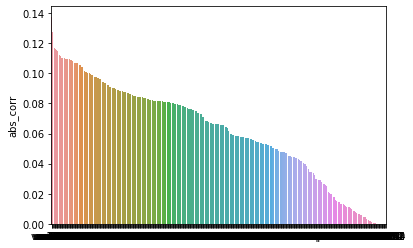

In [ ]:
sns.barplot(data = corr_3, x = corr_3.index, y = 'abs_corr') 

##Random Forest


In [ ]:
train_df = d3_scaled.drop('target', axis=1)

In [ ]:
train_df_v2 = d3_scaled.copy()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1, max_depth=5)
model.fit(train_df_v2.drop(['target'], axis=1),train_df_v2.target)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

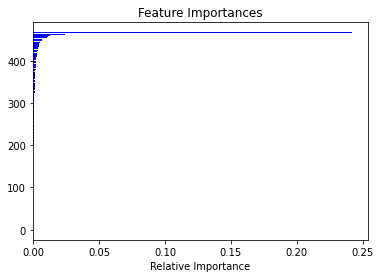

In [ ]:
features = train_df_v2.drop(['target'], axis=1)
importances = model.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
#plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
feat_imp_sum = 0
final_feat_imp_list = []
for i,value in enumerate(reversed(indices)):
  feat_imp_sum = feat_imp_sum + importances[value]
  final_feat_imp_list.append(feat_imp_sum)
  

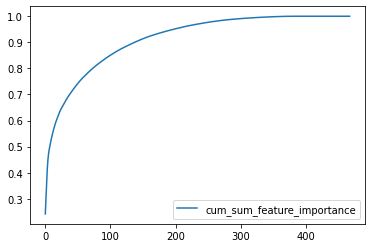

In [ ]:
final_feat_imp_list_df = pd.DataFrame(final_feat_imp_list).rename(columns = {0:'cum_sum_feature_importance'})

final_feat_imp_list_df.plot()

In [ ]:
final_feat_imp_list_df.head()

,cum_sum_feature_importance
0,0.241788
1,0.301214
2,0.359952
3,0.411900
4,0.448094


In [ ]:
print(len(indices))
print(len(train_df_v2.drop(['target'], axis=1).columns))

468
468


In [ ]:
indices[:1]

array([187])

In [ ]:
top_columns_list = indices.tolist()
top_columns_list_names = train_df_v2.drop(['target'], axis=1).columns[top_columns_list]

In [ ]:
top_columns_list_names

Index(['var0660', 'var1024', 'var1073', 'var1074', 'var1023', 'var1075',
       'var0947', 'var1076', 'var1020', 'var1069',
       ...
       'var0485', 'var0497', 'var0528', 'var0502', 'var1062', 'qpid',
       'var1129', 'var1083', 'var1088', 'var1059'],
      dtype='object', length=468)

In [ ]:
len(importances)

468

In [ ]:
feature_importance_randomf = pd.DataFrame(importances[indices], columns = ['R_feature_importance'])
feature_importance_randomf.sort_values(by='R_feature_importance', ascending=False, inplace=True)
feature_importance_randomf

,R_feature_importance
467,0.241788
466,0.059426
465,0.058738
464,0.051948
463,0.036194
...,...
61,0.000000
62,0.000000
63,0.000000
64,0.000000


In [ ]:
feature_importance_randomf.set_index(top_columns_list_names, inplace=True)

In [ ]:
feature_importance_randomf['R_cum_feature_importance'] = final_feat_imp_list

In [ ]:
feature_importance_randomf_1 = feature_importance_randomf.join(corr_3, how='outer').sort_values(by = 'R_feature_importance', ascending=False)

In [ ]:
feature_importance_randomf_1.head(10)

,R_feature_importance,R_cum_feature_importance,correlation,abs_corr
var0660,0.241788,0.241788,0.074732,0.074732
var1024,0.059426,0.301214,0.019368,0.019368
var1073,0.058738,0.359952,-0.106276,0.106276
var1074,0.051948,0.411900,-0.105180,0.105180
var1023,0.036194,0.448094,0.005807,0.005807
var1075,0.023935,0.472029,-0.109374,0.109374
var0947,0.016708,0.488737,-0.004590,0.004590
var1076,0.013181,0.501918,-0.109789,0.109789
var1020,0.013045,0.514964,-0.040526,0.040526
var1069,0.011784,0.526748,-0.109863,0.109863


##Extra Trees Classifier

In [ ]:
X = d3_copy.drop(['target','qpid'], axis=1)  #independent columns
y = d3_copy['target']

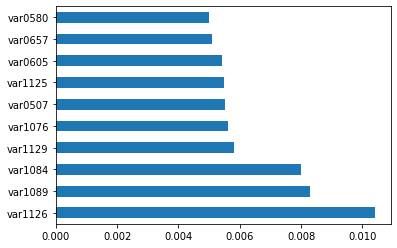

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
Extra_trees_feature_importance = pd.DataFrame(index = X.columns)
Extra_trees_feature_importance['E_feature_importance'] = model.feature_importances_
Extra_trees_feature_importance

,E_feature_importance
var0474,0.003621
var0475,0.003360
var0476,0.001752
var0477,0.004664
var0478,0.003077
...,...
var1131,0.001370
var1132,0.002226
var1133,0.001816
var1134,0.002111


In [ ]:
Extra_trees_feature_importance['E_cum_feature_importance'] = Extra_trees_feature_importance["E_feature_importance"].cumsum()

Extra_trees_feature_importance = Extra_trees_feature_importance.join(feature_importance_randomf_1, how='outer')

In [ ]:
Extra_trees_feature_importance.head()

,E_feature_importance,E_cum_feature_importance,R_feature_importance,R_cum_feature_importance,correlation,abs_corr
qpid,NaN,NaN,0.000000,1.000000,-0.027452,0.027452
var0474,0.003621,0.003621,0.000171,0.992805,-0.053999,0.053999
var0475,0.003360,0.006982,0.000000,1.000000,-0.053999,0.053999
var0476,0.001752,0.008733,0.000000,1.000000,-0.068332,0.068332
var0477,0.004664,0.013397,0.000000,1.000000,0.060014,0.060014


## Lasso Regression

In [ ]:
from sklearn.linear_model import  LassoCV, Lasso
reg = LassoCV()
reg.fit(X, y)
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 6 variables and eliminated the other 461 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

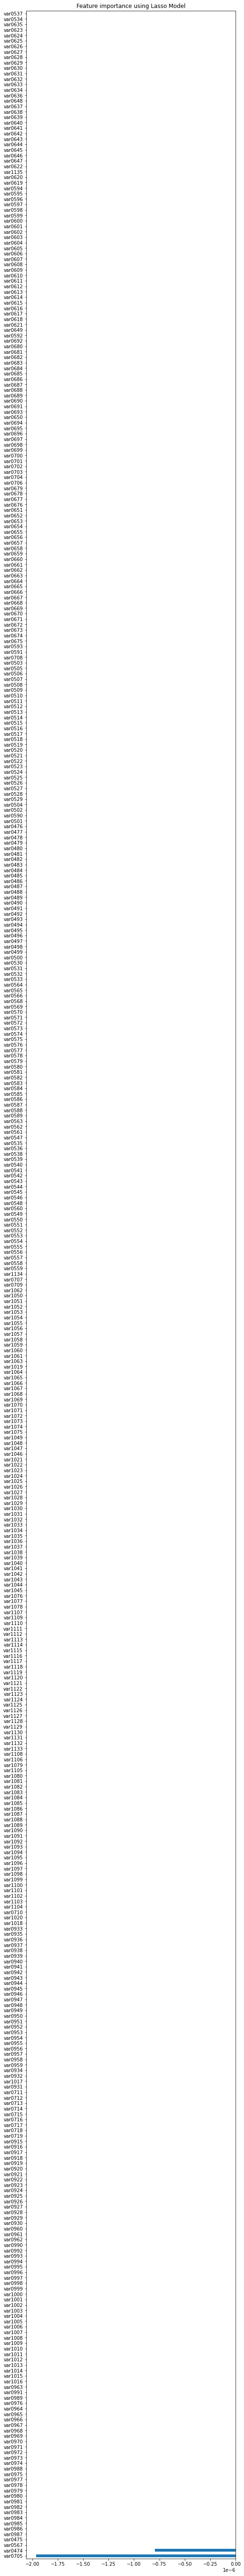

In [ ]:
imp_coef = coef.sort_values()
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (8.0, 100.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [ ]:
Lasso_importance = pd.DataFrame(index = X.columns)
Lasso_importance['Lasso_feature_importance'] = reg.coef_
Lasso_importance['Lasso_cum_importance'] = Lasso_importance['Lasso_feature_importance'].cumsum()
Lasso_importance.head()

,Lasso_feature_importance,Lasso_cum_importance
var0474,-7.930579e-07,-7.930579e-07
var0475,-1.354225e-21,-7.930579e-07
var0476,-0.000000e+00,-7.930579e-07
var0477,0.000000e+00,-7.930579e-07
var0478,0.000000e+00,-7.930579e-07


## Logistic Regression

acc_log: 89.39
Accuracy Score:  0.8939066378413003
AUC:  0.5753084374978874


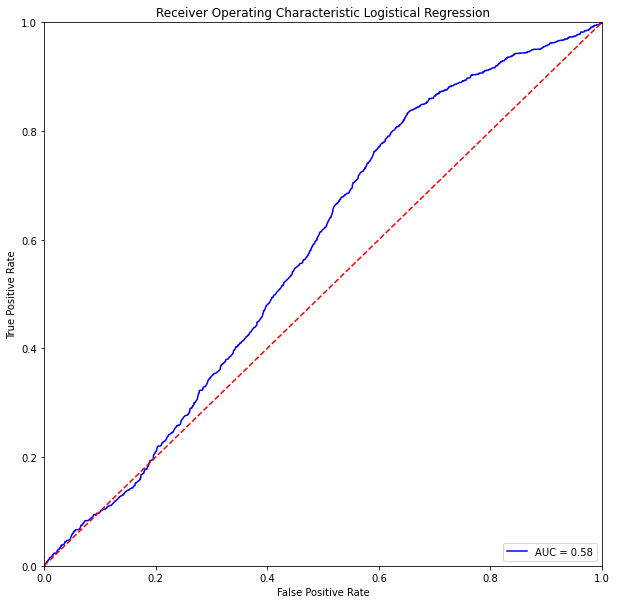

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=833)
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression(solver='liblinear')
model.fit(X, y)
y_model = model.predict(Xtest)
logreg = LogisticRegression()
logreg.fit(Xtrain, ytrain)
Y_pred = logreg.predict(Xtest)
Y_prob = logreg.predict_proba(Xtest)
Y_prob = Y_prob[:,1]
acc_log = round(logreg.score(Xtrain, ytrain) * 100, 2)
accuracy_score_log = accuracy_score(ytest, Y_pred)
print("acc_log:", acc_log)
print("Accuracy Score: ", accuracy_score_log)

fpr, tpr, thresholds = metrics.roc_curve(ytest, Y_prob)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: ", roc_auc)

confusion_matrix = confusion_matrix(ytest, Y_pred)
pd.crosstab(ytest, Y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic Logistical Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
coeff_df = pd.DataFrame(d3_copy.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df

,Feature,Correlation
0,qpid,-5.885727e-05
1,target,-5.885727e-05
2,var0474,-1.066690e-06
3,var0475,-5.617381e-07
4,var0476,-7.273894e-06
...,...,...
464,var1131,-3.415126e-07
465,var1132,-7.739834e-08
466,var1133,-8.969736e-07
467,var1134,NaN


In [ ]:
Logistic_importance = pd.DataFrame(index = d3_copy.columns.delete([0,1]))
Logistic_importance['Logistic_feature_importance'] = logreg.coef_[0]
Logistic_importance['Logistic_cum_importance'] = Logistic_importance['Logistic_feature_importance'].cumsum()
Logistic_importance.head()

# Merge & export

From all the methods used, merge the important feature names and their importance together and export it into drive

In [ ]:
Feature_importance_merged3 = Linear_importance.join(Extra_trees_feature_importance, how='outer').join(Lasso_importance, how='outer').join(Logistic_importance, how='outer')

In [ ]:
Feature_importance_merged3.head()

,Linear_feature_importance,Linear_cum_importance,E_feature_importance,E_cum_feature_importance,R_feature_importance,R_cum_feature_importance,correlation,abs_corr,Lasso_feature_importance,Lasso_cum_importance,Logistic_feature_importance,Logistic_cum_importance
qpid,NaN,NaN,NaN,NaN,0.000000,1.000000,-0.027452,0.027452,NaN,NaN,NaN,NaN
var0474,34054.534160,34054.534160,0.003621,0.003621,0.000171,0.992805,-0.053999,0.053999,-7.930579e-07,-7.930579e-07,-5.885727e-05,-0.000059
var0475,-34054.534158,0.000002,0.003360,0.006982,0.000000,1.000000,-0.053999,0.053999,-1.354225e-21,-7.930579e-07,-5.885727e-05,-0.000118
var0476,0.000038,0.000040,0.001752,0.008733,0.000000,1.000000,-0.068332,0.068332,-0.000000e+00,-7.930579e-07,-1.066690e-06,-0.000119
var0477,-0.000157,-0.000117,0.004664,0.013397,0.000000,1.000000,0.060014,0.060014,0.000000e+00,-7.930579e-07,-5.617381e-07,-0.000119


In [ ]:
# Export
from google.colab import files

Feature_importance_merged3.to_csv('Feature_importance_merged_source3.csv')
!cp Feature_importance_merged_source3.csv "/content/drive/MyDrive/Capstone/files"